In [2]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

domain_names = {
    'github': 'GitHub',
    'arxiv': 'arXiv',
    'c4': 'C4',
    'book': 'Books',
    'wikipedia': 'Wikipedia',
}

def load_data(input_path):
    with open(input_path, 'rb') as f:
        data = pickle.load(f)
    return data

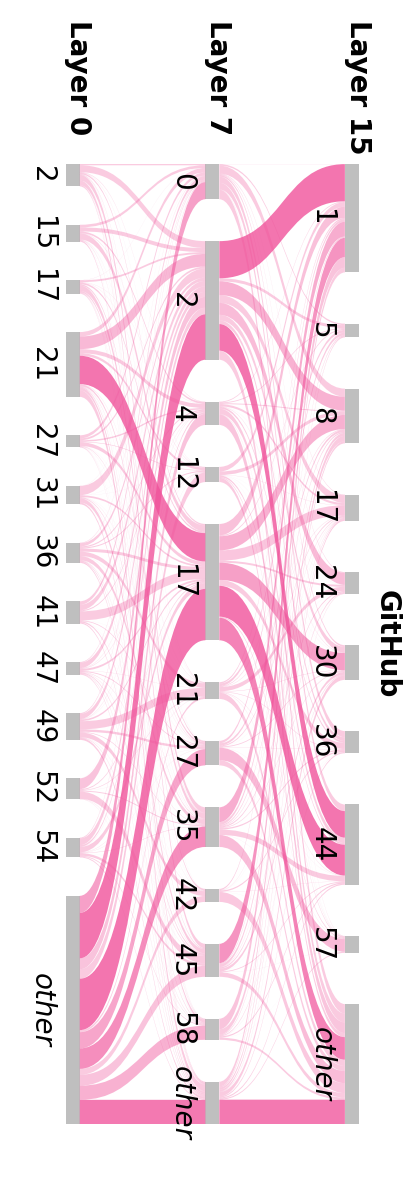

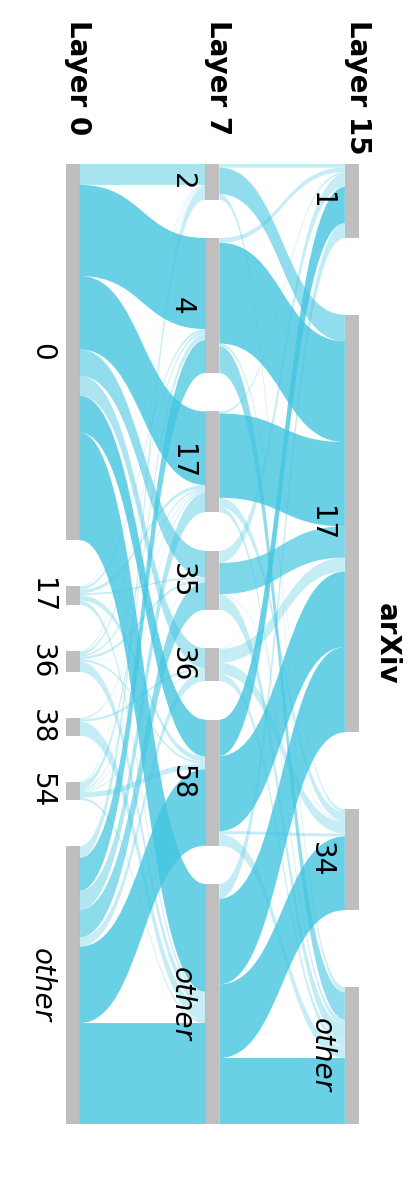

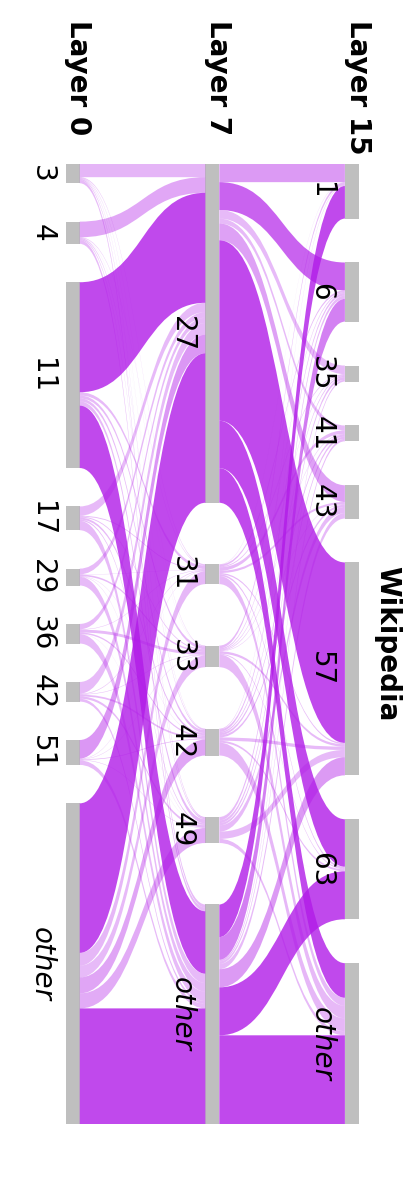

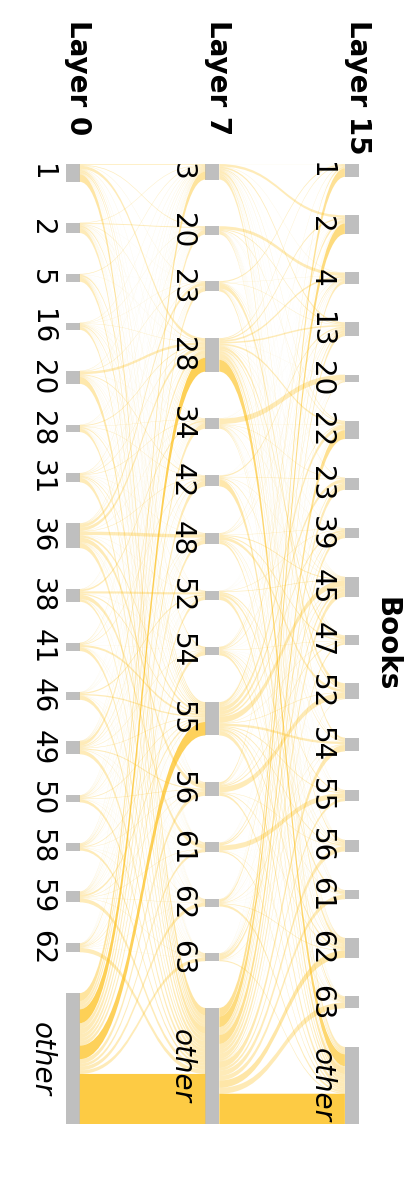

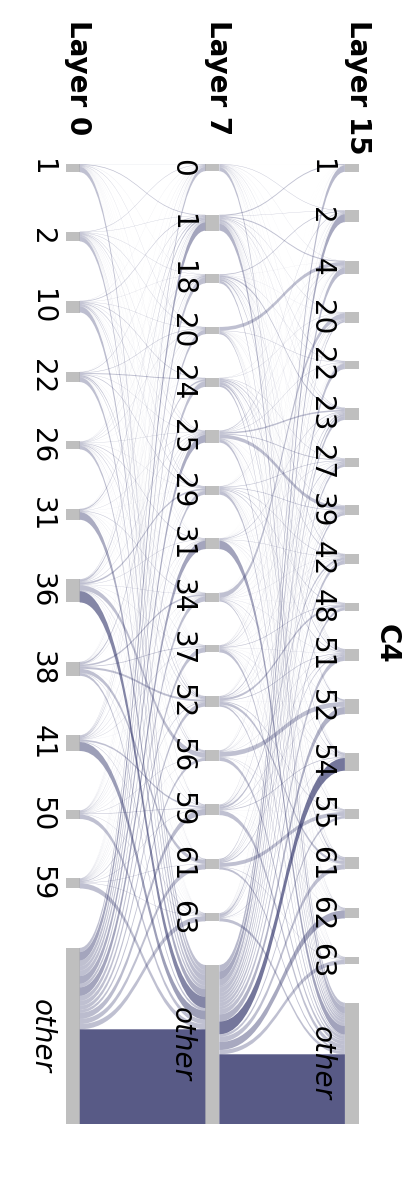

In [12]:
import matplotlib.pyplot as plt
from sankeyflow import sankeyflow  # requires pip install sankeyflow
import numpy as np
import pandas as pd

model="olmoe"
n = 64
other_disabled = False

COLORS = {
    'github': '#F0539B',
    'arxiv': '#43C5E0',
    'wikipedia': '#B11BE8',
    'book': '#FDBE15',
    'c4': '#2E3168',
}

domain_names = {
    'github': 'GitHub',
    'arxiv': 'arXiv',
    'c4': 'C4',
    'book': 'Books',
    'wikipedia': 'Wikipedia',
}


for domain in COLORS.keys():
    # Assuming load_data function and input_path are defined as in your original code
    input_path = f"routing_output/{model}/expert_counts_top1/{domain}.pkl"
    counters0, counters7, counters15 = load_data(input_path)

    counters = {0: counters0, 7: counters7, 15: counters15}

    for i in counters:
        for e in range(n):
            counters[i][e] += 0

    input_path = f"routing_output/{model}/expert_counts_crosslayer_top1/{domain}.pkl"
    cross_counters0_7, cross_counters7_15 = load_data(input_path)
    cross_counters = {(0, 7): cross_counters0_7, (7, 15): cross_counters7_15}

    for i in cross_counters:
        for e1 in range(n):
            for e2 in range(n):
                cross_counters[i][(e1, e2)] += 0

    num_layers = 3
    tokens = sum(counters[0].values())
    labels = [
        (f"{i}.{e:02}" if counters[i][e] > 1.5*tokens/n or other_disabled else f"{i}.other")
        for i in sorted(counters)
        for e in sorted(counters[i])
    ]

    edges = [
        (f"{i}.{e1:02}" if f"{i}.{e1:02}" in labels else f"{i}.other",
        f"{j}.{e2:02}" if f"{j}.{e2:02}" in labels else f"{j}.other", c)
        for i, j in cross_counters
        for (e1, e2), c in cross_counters[i,j].items()
    ]

    df = pd.DataFrame(edges, columns=['source', 'target', 'count'])
    df = df.groupby(['source', 'target']).sum().reset_index()

    palette = sns.color_palette(['#F0539B', '#43C5E0', '#2E3168', '#FDBE15', '#FF6B6B', 'grey'])

    max_count = df['count'].max()

    flows = [(s, t, c, {'color': sns.color_palette([COLORS[domain]])[0] + (min(max((c/tokens*n/4), 0.3),0.8),)}) for s, t, c in df.values]
    flows = sorted(flows)

    fig, ax = plt.subplots(figsize=(2.2, 6), dpi=200)

    FONTSIZE = 10

    s = sankeyflow.Sankey(
        flows=flows,
        flow_opts=dict(
            curvature=0.5,
        ),
        node_opts=dict(
            color=palette[5][:3] + (0.5,),
            label_opts=dict(fontsize=FONTSIZE, rotation=270, linespacing=0.1, multialignment="center"),
            label_pos="left",
            label_format="{label}",
            node_width=0.2,
        ),
        node_pad_y_min=0.04,
        node_pad_y_max=0.1,
        align_y="justify",
        node_width=0.1,
    )

    # Special node label formatting
    for node_list in s.nodes:
        for node in node_list:
            node.label = node.label.split(".")[1]
            if node.label[0] == "0":
                node.label = node.label[1:]
            if node.label == "other":
                node.label_opts = {"fontstyle": "italic", **node.label_opts}
                node.label = f"other\n" + " " * 10
            node.label="\n" + node.label


    s.draw(ax=ax)

    # Add extra texts
    ax.text(s.nodes[0][0].x-0.01, 1.15, "Layer 0", ha="left", va="top", fontsize=FONTSIZE, rotation=270, fontweight="bold")
    ax.text(s.nodes[1][0].x-0.01, 1.15, "Layer 7", ha="left", va="top", fontsize=FONTSIZE, rotation=270, fontweight="bold")
    ax.text(s.nodes[2][0].x-0.01, 1.15, "Layer 15", ha="left", va="top", fontsize=FONTSIZE, rotation=270,  fontweight="bold")

    ax.text(s.nodes[2][0].x+0.2, 0.5, domain_names[domain], ha="left", va="center", fontsize=FONTSIZE, rotation=270,  fontweight="bold")

    plt.axis('off')
    plt.tight_layout()
    plt.savefig("routing_cross_layer_sankey_olmoe_" + domain + ".pdf", bbox_inches='tight')
    plt.show()

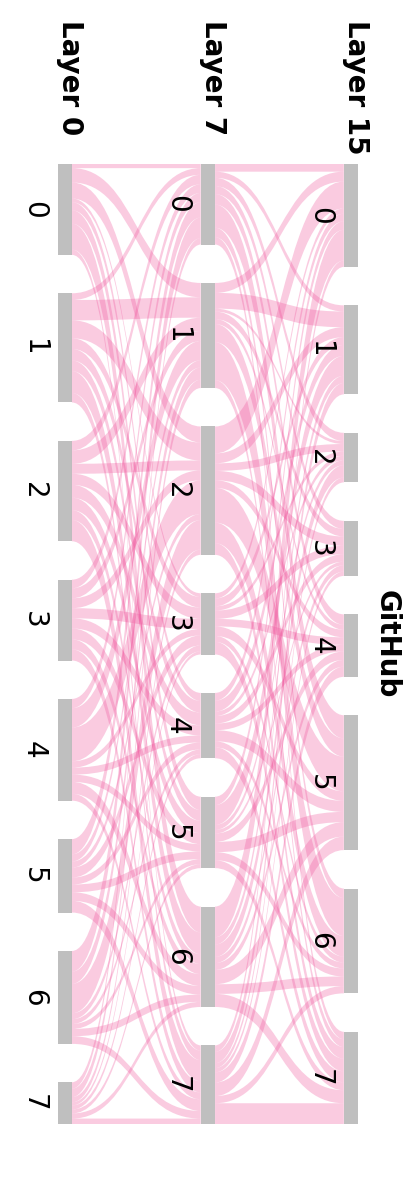

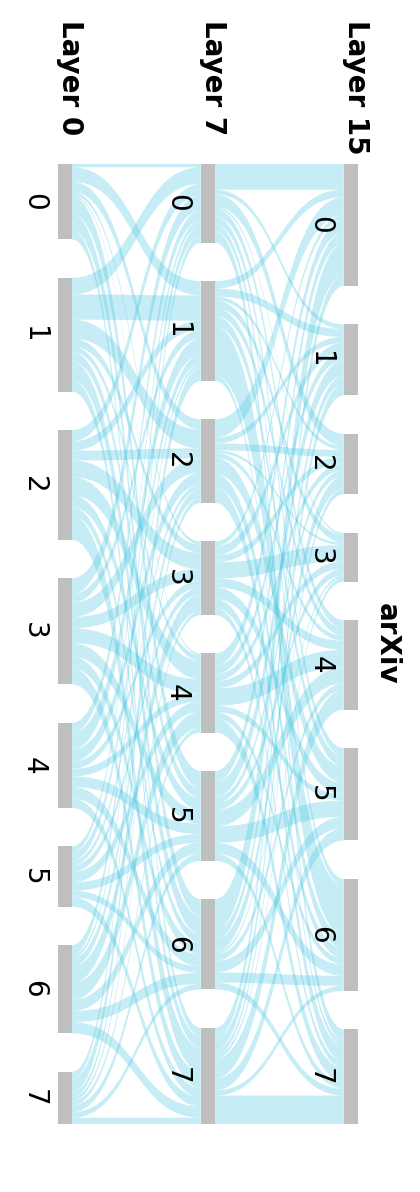

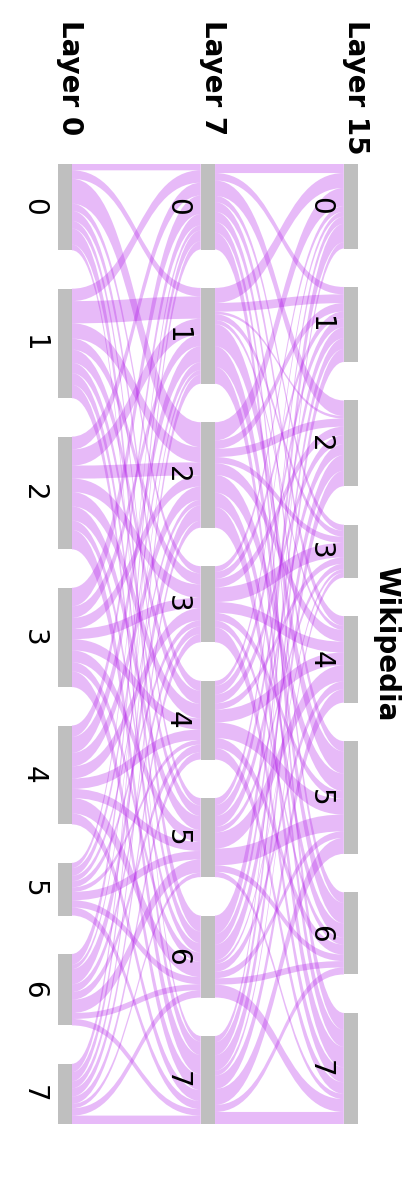

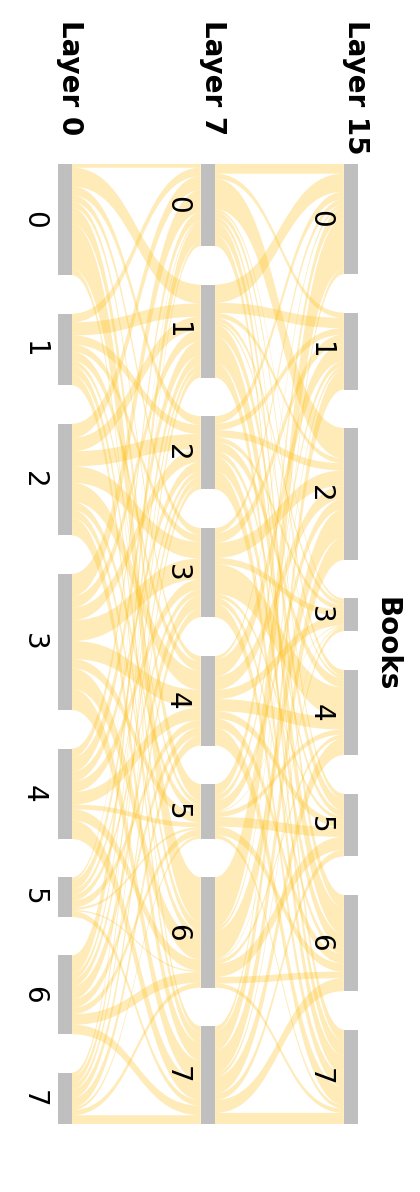

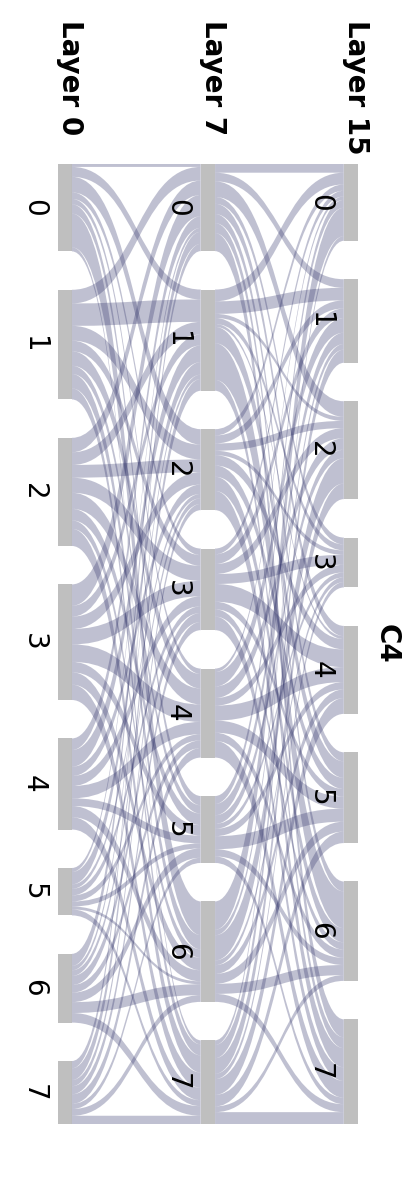

In [13]:
import matplotlib.pyplot as plt
from sankeyflow import sankeyflow  # requires pip install sankeyflow
import numpy as np
import pandas as pd

model="mistral"
n = 8
other_disabled = True


COLORS = {
    'github': '#F0539B',
    'arxiv': '#43C5E0',
    'wikipedia': '#B11BE8',
    'book': '#FDBE15',
    'c4': '#2E3168',
}

domain_names = {
    'github': 'GitHub',
    'arxiv': 'arXiv',
    'c4': 'C4',
    'book': 'Books',
    'wikipedia': 'Wikipedia',
}


for domain in COLORS.keys():
    # Assuming load_data function and input_path are defined as in your original code
    input_path = f"routing_output/{model}/expert_counts_top1/{domain}.pkl"
    counters0, counters7, counters15 = load_data(input_path)

    counters = {0: counters0, 7: counters7, 15: counters15}

    for i in counters:
        for e in range(n):
            counters[i][e] += 0

    input_path = f"routing_output/{model}/expert_counts_crosslayer_top1/{domain}.pkl"
    cross_counters0_7, cross_counters7_15 = load_data(input_path)
    cross_counters = {(0, 7): cross_counters0_7, (7, 15): cross_counters7_15}

    for i in cross_counters:
        for e1 in range(n):
            for e2 in range(n):
                cross_counters[i][(e1, e2)] += 0

    num_layers = 3
    tokens = sum(counters[0].values())
    labels = [
        (f"{i}.{e:02}" if counters[i][e] > 1.5*tokens/n or other_disabled else f"{i}.other")
        for i in sorted(counters)
        for e in sorted(counters[i])
    ]

    edges = [
        (f"{i}.{e1:02}" if f"{i}.{e1:02}" in labels else f"{i}.other",
        f"{j}.{e2:02}" if f"{j}.{e2:02}" in labels else f"{j}.other", c)
        for i, j in cross_counters
        for (e1, e2), c in cross_counters[i,j].items()
    ]

    df = pd.DataFrame(edges, columns=['source', 'target', 'count'])
    df = df.groupby(['source', 'target']).sum().reset_index()

    palette = sns.color_palette(['#F0539B', '#43C5E0', '#2E3168', '#FDBE15', '#FF6B6B', 'grey'])

    max_count = df['count'].max()

    flows = [(s, t, c, {'color': sns.color_palette([COLORS[domain]])[0] + (min(max((c/tokens*n/4), 0.3),0.8),)}) for s, t, c in df.values]
    flows = sorted(flows)

    fig, ax = plt.subplots(figsize=(2.2, 6), dpi=200)

    FONTSIZE = 10

    s = sankeyflow.Sankey(
        flows=flows,
        flow_opts=dict(
            curvature=0.5,
        ),
        node_opts=dict(
            color=palette[5][:3] + (0.5,),
            label_opts=dict(fontsize=FONTSIZE, rotation=270, linespacing=0.1, multialignment="center"),
            label_pos="left",
            label_format="{label}",
            node_width=0.2,
        ),
        node_pad_y_min=0.04,
        node_pad_y_max=0.1,
        align_y="justify",
        node_width=0.1,
    )

    # Special node label formatting
    for node_list in s.nodes:
        for node in node_list:
            node.label = node.label.split(".")[1]
            if node.label[0] == "0":
                node.label = node.label[1:]
            if node.label == "other":
                node.label_opts = {"fontstyle": "italic", **node.label_opts}
                node.label = f"other\n" + " " * 10
            node.label="\n" + node.label


    s.draw(ax=ax)

    # Add extra texts
    ax.text(s.nodes[0][0].x-0.01, 1.15, "Layer 0", ha="left", va="top", fontsize=FONTSIZE, rotation=270, fontweight="bold")
    ax.text(s.nodes[1][0].x-0.01, 1.15, "Layer 7", ha="left", va="top", fontsize=FONTSIZE, rotation=270, fontweight="bold")
    ax.text(s.nodes[2][0].x-0.01, 1.15, "Layer 15", ha="left", va="top", fontsize=FONTSIZE, rotation=270,  fontweight="bold")

    ax.text(s.nodes[2][0].x+0.2, 0.5, domain_names[domain], ha="left", va="center", fontsize=FONTSIZE, rotation=270,  fontweight="bold")

    plt.axis('off')
    plt.tight_layout()
    plt.savefig("routing_cross_layer_sankey_mistral_" + domain + ".pdf", bbox_inches='tight')
    plt.show()